<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Disser_Exploring_factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [2]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/delite/beta/egg_diploma.csv"
data = pd.read_csv(file_path)
data

№                 Фамилия, имя  Интернет ответ  Интернет время  Возраст  \
0    1                           ИЕ               0              30       13   
1    3                           МВ               1             291       13   
2    5                           ЩЗ               1             420       13   
3    6                           КВ               0             310       12   
4    7                           ИМ               0              36       11   
..  ..                          ...             ...             ...      ...   
57  67                      Ели Мар               0              65       14   
58  68                      Гри Але               0              55       14   
59  69                      Пол Бог               1             182       15   
60  70                      Кры Яро               0             572       10   
61  77  Паш Вик (левой рукой пишет)               0              53       14   

    Пол  Time-test: Среднее 1 1  \
0     0                   280.1   
1     1                   223.3   
2     0                   291.8   
3     1                   314.5   
4     1                   307.9   
..  ...                     ...   
57    0                   280.2   
58    1                   292.3   
59    1                   341.2   
60    1                   334.8   
61    1                   269.7   

    Time-test: Среднее время реакции, серия 1 (Часть 2)  \
0                                               288.1     
1                                               273.5     
2                                               288.0     
3                                               338.0     
4                                               282.3     
..                                                ...     
57                                              342.6     
58                                              278.4     
59                                              300.4     
60                                              355.1     
61                                              323.1     

    Time-test: Среднее время реакции, серия 2 (Часть 1)  \
0                                               363.3     
1                                               334.4     
2                                               341.4     
3                                               420.2     
4                                               258.7     
..                                                ...     
57                                              322.0     
58                                              353.9     
59                                              434.3     
60                                              507.5     
61                                              388.6     

    Time-test: Среднее время реакции, серия 2 (Часть 2)  ...  \
0                                               347.0    ...   
1                                               318.7    ...   
2                                               359.7    ...   
3                                               433.7    ...   
4                                               261.8    ...   
..                                                ...    ...   
57                                              374.1    ...   
58                                              360.7    ...   
59                                              492.7    ...   
60                                              502.3    ...   
61                                              442.3    ...   

    Modularity(Posle_8-12)  Global Efficiency(Posle_8-12)  \
0                 0.057000                       0.812000   
1                 0.017000                       0.952000   
2                 0.202000                       0.583000   
3                 0.099000                       0.763000   
4                 0.067000                       0.874000   
..                     ...                            ...   
57       

In [5]:
data.keys()

Index(['№', 'Фамилия, имя', 'Интернет ответ', 'Интернет время', 'Возраст',
       'Пол', 'Time-test: Среднее 1 1',
       'Time-test: Среднее время реакции, серия 1 (Часть 2)',
       'Time-test: Среднее время реакции, серия 2 (Часть 1)',
       'Time-test: Среднее время реакции, серия 2 (Часть 2)',
       'Time-test: Проп 1 1',
       'Time-test: Количество пропусков, серия 1 (Часть 2)',
       'Time-test: Количество пропусков, серия 2 (Часть 1)',
       'Time-test: Количество пропусков, серия 2 (Часть 2)',
       'Time-test: Ош 2 1', 'Time-test: Количество ошибок, серия 2 (Часть 2) ',
       'WMem: Количество объектов, серия 1',
       'WMem: Количество объектов, серия 2',
       'WMem: Количество объектов, серия 3', 'WMem: Время серии 1',
       'WMem: Время серии 2', 'WMem: Время серии 3', 'Забывание ', 'Обучение',
       'Количество фиксаций до области интереса (Чтение инструкции)',
       'Время до первой фиксации\n',
       'Время фиксации на области интереса (тексте)',
       '

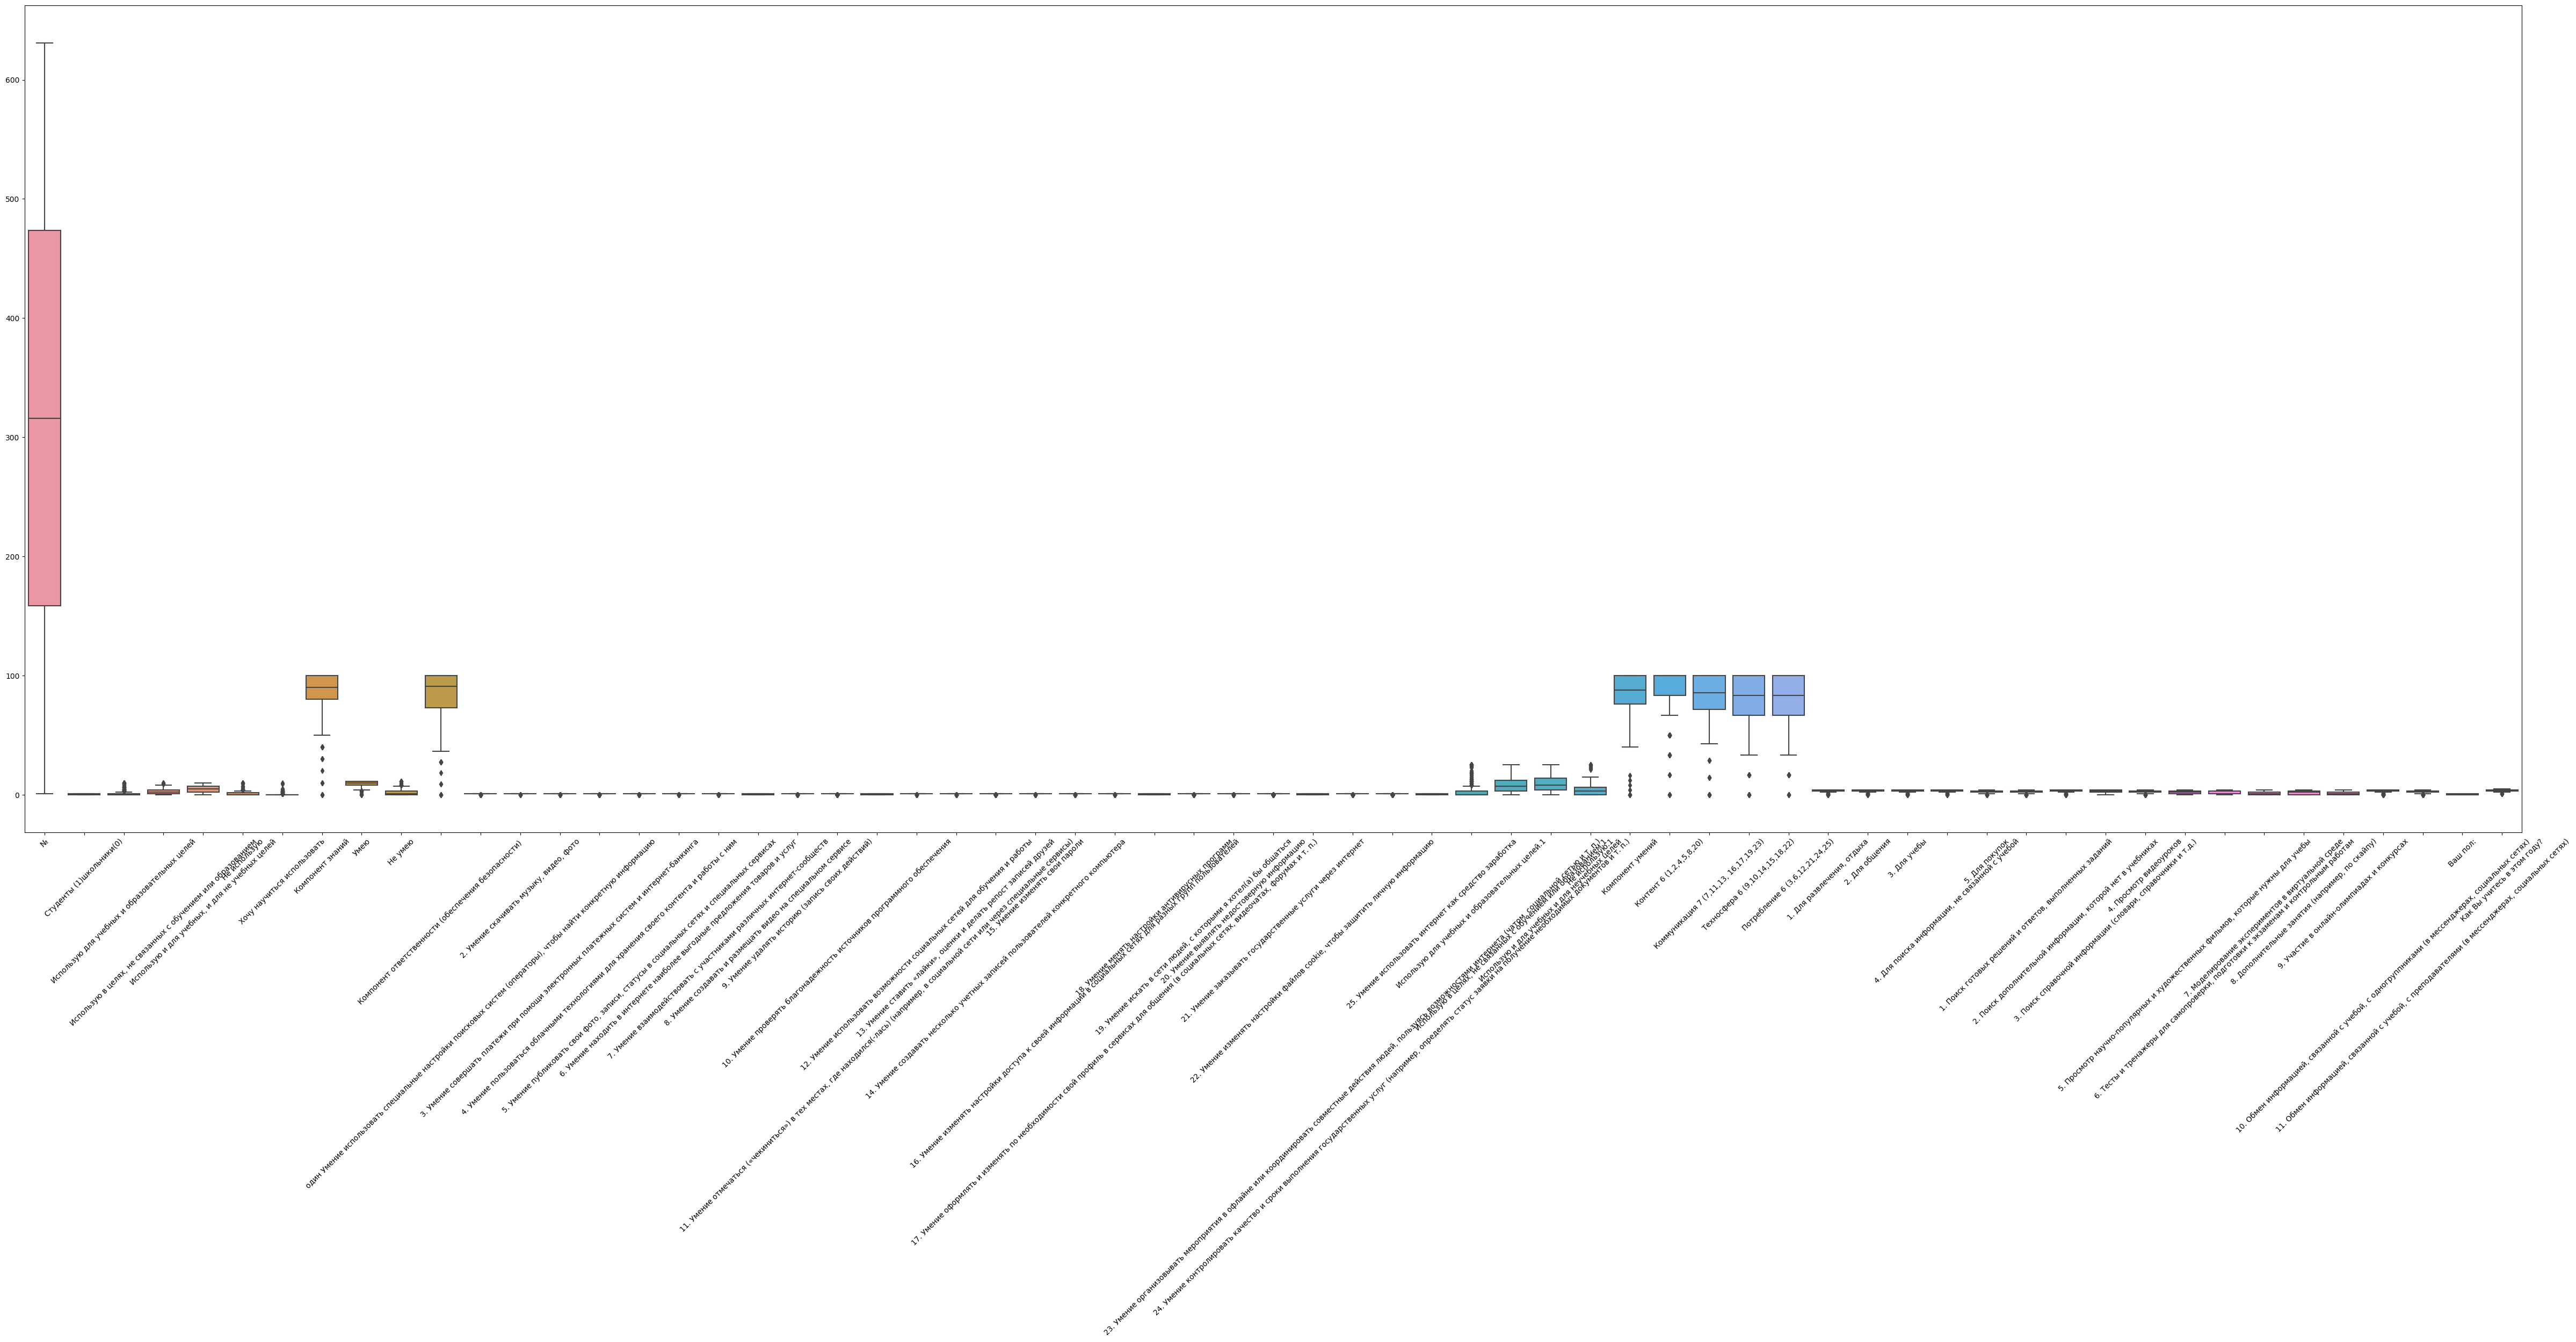

In [ ]:
fig,ax = plt.subplots(1,figsize=(60, 20))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [ ]:
import pandas as pd

# Create an empty DataFrame to store the outliers
outliers_df = pd.DataFrame(columns=['Variable', 'Outlier Values'])

# Calculate and store the outliers for each variable
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    if not outliers.empty:
        outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)

# Display the table with outliers
print("Outliers Table:")
display(HTML(outliers_df.to_html()))


Outliers Table:


<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [ ]:
import pandas as pd

# Create an empty dictionary to store the count of outliers for each variable
outlier_counts = {}

# Calculate and store the count of outliers for each variable
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outlier_counts[column] = len(outliers)

# Create a DataFrame with variable names and outlier counts
outliers_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier Count'])

# Sort the DataFrame by outlier count in descending order
outliers_df = outliers_df.sort_values(by='Outlier Count', ascending=False)

# Display the sorted table
print("Variables with Outlier Counts (Sorted):")
display(outliers_df)


Variables with Outlier Counts (Sorted):


Variable  Outlier Count
29  10. Обмен информацией, связанной с учебой, с о...             63
21  2. Поиск дополнительной информации, которой не...             50
20  1. Поиск готовых решений и ответов, выполненны...             36
23                            4. Просмотр видеоуроков             31
10                                        Комп.знания             17
11                                          Ответств.             16
16                                            Контент             15
15                                         Техносфера             15
18                                       Коммуникация             14
12                                        Неуч.умения             12
3                                    Тол. к противор.             12
1                                          Ф.внимания             12
2                                         К.атрибуция             11
5                                      Общий пок. А/Х              9
14                                       Комп. Умения              9
8                                         Неуч.знания              6
19                                        Потребление              6
4                                         В.изменений              6
17                                       Техносфера.1              5
26  7. Моделирование экспериментов в виртуальной с...              0
30  11. Обмен информацией, связанной с учебой, с п...              0
31                                           Ваш пол:              0
28         9. Участие в онлайн-олимпиадах и конкурсах              0
32                                       Ваш возраст:              0
27    8. Дополнительные занятия (например, по скайпу)              0
0                                    Студент/Учащийся              0
25  6. Тесты и тренажеры для самопроверки, подгото...              0
24  5. Просмотр научно-популярных и художественных...              0
22  3. Поиск справочной информации (словари, справ...              0
13                                  Уч.и Неуч. умения              0
9                                   Уч.и Неуч. Знания              0
7                                           Р.уч.акт.              0
6                                               Обуч.              0
33                        Как Вы учитесь в этом году?              0

In [6]:
! pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 627.9 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42563 sha256=c24ca61664a0736b1c3dec6b8284717ee761ffc0fc84f895c83b264765664992
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [ ]:
# path to file in google drive

file_pupils = "/content/gdrive/My Drive/Colab Notebooks/pupils.csv"
pupils = pd.read_csv(file_pupils)
pupils

№  Студенты (1)школьники(0)  \
0    307                         0   
1    308                         0   
2    309                         0   
3    310                         0   
4    311                         0   
..   ...                       ...   
258  565                         0   
259  566                         0   
260  567                         0   
261  568                         0   
262  569                         0   

     Использую для учебных и образовательных целей  \
0                                                1   
1                                                0   
2                                                9   
3                                                3   
4                                                5   
..                                             ...   
258                                             10   
259                                              0   
260                                              2   
261                                              1   
262                                              0   

     Использую в целях, не связанных с обучением или образованием  \
0                                                    4              
1                                                    2              
2                                                    1              
3                                                    3              
4                                                    2              
..                                                 ...              
258                                                  0              
259                                                  1              
260                                                  1              
261                                                  0              
262                                                  2              

     Использую и для учебных, и для не учебных целей  Не использую  \
0                                                  4             1   
1                                                  8             0   
2                                                  0             0   
3                                                  2             1   
4                                                  2             1   
..                                               ...           ...   
258                                                0             0   
259                                                8             1   
260                                                2             3   
261                                                9             0   
262                                                6             2   

     Компонент знаний  Умею  Не умею  \
0                  90     6        5   
1                 100    10        1   
2                 100     8        3   
3                  80    11        0   
4                  90    11        0   
..                ...   ...      ...   
258               100    11        0   
259                90     9        2   
260                50     6        5   
261               100    10        1   
262                80     8        3   

     Компонент ответственности (обеспечения безопасности)   ...  \
0                                                54.55      ...   
1                                                90.91      ...   
2                                                72.73      ...   
3                                               100.00      ...   
4                                               100.00      ...   
..                                                 ...      ...   
258                                             100.00      ...   
259                                              81.82      ...   
260                                              54.55      ...   
261                                              90.91      ...   
262          

In [ ]:
# path to file in google drive

file_students = "/content/gdrive/My Drive/Colab Notebooks/students.csv"
students = pd.read_csv(file_students)
students

№  Студенты (1)школьники(0)  \
0      1                         1   
1      2                         1   
2      3                         1   
3      4                         1   
4      5                         1   
..   ...                       ...   
301  302                         1   
302  303                         1   
303  304                         1   
304  305                         1   
305  306                         1   

     Использую для учебных и образовательных целей  \
0                                                3   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
301                                              0   
302                                              1   
303                                              0   
304                                              0   
305                                              0   

     Использую в целях, не связанных с обучением или образованием  \
0                                                    2              
1                                                    4              
2                                                    3              
3                                                    3              
4                                                    2              
..                                                 ...              
301                                                  0              
302                                                  1              
303                                                  0              
304                                                  2              
305                                                  0              

     Использую и для учебных, и для не учебных целей  Не использую  \
0                                                  5             0   
1                                                  5             1   
2                                                  4             3   
3                                                  7             0   
4                                                  8             0   
..                                               ...           ...   
301                                                9             0   
302                                                7             0   
303                                                9             0   
304                                                8             0   
305                                               10             0   

     Компонент знаний  Умею  Не умею  \
0                 100     7        4   
1                  90     4        7   
2                  70     6        5   
3                 100    10        1   
4                 100     9        2   
..                ...   ...      ...   
301                90    11        0   
302                90    10        1   
303                90     7        4   
304               100    11        0   
305               100    11        0   

     Компонент ответственности (обеспечения безопасности)   ...  \
0                                                63.64      ...   
1                                                36.36      ...   
2                                                54.55      ...   
3                                                90.91      ...   
4                                                81.82      ...   
..                                                 ...      ...   
301                                             100.00      ...   
302                                              90.91      ...   
303                                              63.64      ...   
304                                             100.00      ...   
305          

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Total 19.57% Cumulative Variance explained by the 1 factors
Total 35.56% Cumulative Variance explained by the 2 factors
Total 48.89% Cumulative Variance explained by the 3 factors
Total 60.38% Cumulative Variance explained by the 4 factors
Total 69.07% Cumulative Variance explained by the 5 factors
Total 76.15% Cumulative Variance explained by the 6 factors
Total 82.92% Cumulative Variance explained by the 7 factors
Total 89.02% Cumulative Variance explained by the 8 factors
Total 93.16% Cumulative Variance explained by the 9 factors
Total 96.09% Cumulative Variance explained by the 10 factors
Total 98.74% Cumulative Variance explained by the 11 factors
Total 100.00% Cumulative Variance explained by the 12 factors
Factor Loadings Table:


Bartlett’s Test:
Chi-Square Value: 175.54813600999498
P-value: 6.9258010867689756e-12

Kaiser-Meyer-Olkin (KMO) Test:
KMO Overall: [0.54106393 0.49128613 0.5232948  0.51315494 0.63916356 0.44216975
 0.45104119 0.57480347 0.40802624 0.51060441 0.56294736 0.42905448]
KMO Model: 0.49981502035510333


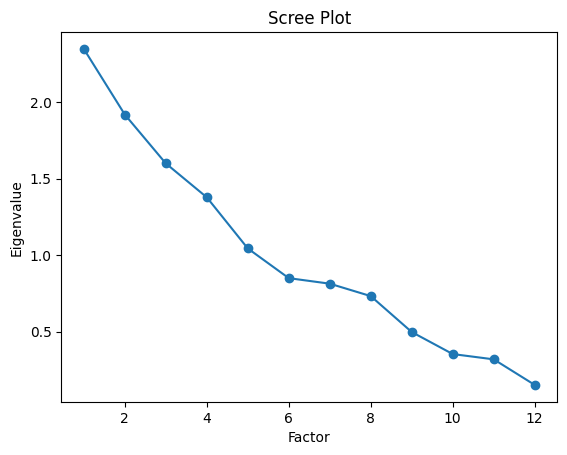

Descriptive Statistics:


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from IPython.display import display, HTML

# Assume you have loaded your data into the 'data' DataFrame


#Specify the variables you want to include in the factor analysis
selected_variables = [
       'Интернет ответ', 'Интернет время',
       #'Возраст',
       'Time-test: Среднее 1 1',
       'Time-test: Среднее время реакции, серия 1 (Часть 2)',
       #'Time-test: Среднее время реакции, серия 2 (Часть 1)',
       #'Time-test: Среднее время реакции, серия 2 (Часть 2)',
       #'Time-test: Проп 1 1',
       'Time-test: Количество пропусков, серия 1 (Часть 2)',
       #'Time-test: Количество пропусков, серия 2 (Часть 1)',
       #'Time-test: Количество пропусков, серия 2 (Часть 2)',
       'Time-test: Ош 2 1', 'Time-test: Количество ошибок, серия 2 (Часть 2) ',
       #'WMem: Количество объектов, серия 1',
       'WMem: Количество объектов, серия 2',
       #'WMem: Количество объектов, серия 3',
       'WMem: Время серии 1',
       #'WMem: Время серии 2', 'WMem: Время серии 3', 'Забывание ', 'Обучение',
       #'Количество фиксаций до области интереса (Чтение инструкции)',
       #'Время до первой фиксации\n',
       #'Время фиксации на области интереса (тексте)',
       #'Длительность первой фиксации на области интереса',
       #'Число возвратов в область',
       #'Среднее время фиксации', 'Все фиксации',
       #'Амплитуда саккады', 'Количество саккад', 'Средняя скорость саккады',
       #'Modularity (Do_13-30)',
       'Global Efficiency(Do_13-30)',
       #'Local Efficiency(Do_13-30)', 'Global Connectivity Index(Do_13-30)',
       #'Network Density(Do_13-30)', 'Clustering Coefficient(Do_13-30)',
       #'Average Path Length(Do_13-30)', 'Node Strength(Do_13-30)',
       #'Node Betweenness Centrality(Do_13-30)', 'Assortativity(Do_13-30)',
       #'Modularity(Posle_13-30)',
       'Global Efficiency(Posle_13-30)',
       #'Local Efficiency(Posle_13-30)',
       #'Global Connectivity Index(Posle_13-30)',
       #'Network Density(Posle_13-30)', 'Clustering Coefficient(Posle_13-30)',
       #'Average Path Length(Posle_13-30)', 'Node Strength(Posle_13-30)',
       #'Node Betweenness Centrality(Posle_13-30)',
       #'Assortativity(Posle_13-30)',
       #'Modularity(Do_8-12)',
       #'Global Efficiency(Do_8-12)',
       #'Local Efficiency(Do_8-12)',
       #'Global Connectivity Index(Do_8-12)', 'Network Density(Do_8-12)',
       #'Clustering Coefficient(Do_8-12)', 'Average Path Length(Do_8-12)',
       #'Node Strength(Do_8-12)', 'Node Betweenness Centrality(Do_8-12)',
       #'Assortativity(Do_8-12)',
       #'Modularity(Posle_8-12)',
       'Global Efficiency(Posle_8-12)',
       #'Local Efficiency(Posle_8-12)',
       #'Global Connectivity Index(Posle_8-12)', 'Network Density(Posle_8-12)',
       #'Clustering Coefficient(Posle_8-12)', 'Average Path Length(Posle_8-12)',
       #'Node Strength(Posle_8-12)', 'Node Betweenness Centrality(Posle_8-12)',
       #'Assortativity(Posle_8-12)'
       ]  # Replace with the actual variable names you want to include


selected_data = data[selected_variables]

# Create a new DataFrame with only the selected variables
#selected_data = data[selected_variables]

# Specify the number of factors you want to extract
num_factors = 3

# Calculate the cumulative variance explained by factors
cumulative_variance_explained = []
for i in range(1, len(selected_variables) + 1):
    factor_analyzer = FactorAnalyzer(rotation='varimax', method='principal', n_factors=i)
    factor_analyzer.fit(selected_data)
    fa_var = factor_analyzer.get_factor_variance()
    total_cum_variance = fa_var[-1][-1]  # Access the last element of the array
    cumulative_variance_explained.append(total_cum_variance)

    #The rotation must be one of the following: ['varimax', !'oblimax', !'quartimax', 'equamax',
    #'geomin_ort', 'promax', 'oblimin', !'quartimin', 'geomin_obl', None]

# Print the cumulative variance explained by factors
for i, variance_explained in enumerate(cumulative_variance_explained):
    print(f"Total {variance_explained * 100:.2f}% Cumulative Variance explained by the {i + 1} factors")

# Initialize the factor analyzer with the desired number of factors
factor_analyzer = FactorAnalyzer(rotation='varimax', n_factors=num_factors, method='principal')

# Fit the model to your selected data
factor_analyzer.fit(selected_data)

# Get the factor loadings
factor_loadings = factor_analyzer.loadings_

# Create a pandas DataFrame from the factor loadings
factor_loading_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(num_factors)], index=selected_data.columns)

# Print the factor loadings table with grid lines using HTML
print("Factor Loadings Table:")
display(HTML(factor_loading_df.to_html()))

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(selected_data)
print("Bartlett’s Test:")
print("Chi-Square Value:", chi_square_value)
print("P-value:", p_value)

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(selected_data)
print("\nKaiser-Meyer-Olkin (KMO) Test:")
print("KMO Overall:", kmo_all)
print("KMO Model:", kmo_model)

# Scree Plot
ev, v = factor_analyzer.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()


# Calculate basic descriptive statistics for the selected data
descriptive_stats = selected_data.describe()

# Calculate skewness for each variable
skewness = selected_data.skew()

# Calculate kurtosis for each variable
kurtosis_value = selected_data.kurtosis()

# Add skewness and kurtosis to the descriptive statistics DataFrame
descriptive_stats.loc['Skewness'] = skewness
descriptive_stats.loc['Kurtosis'] = kurtosis_value

# Print the descriptive statistics
print("Descriptive Statistics:")
display(HTML(descriptive_stats.to_html()))

Correlation Matrix:


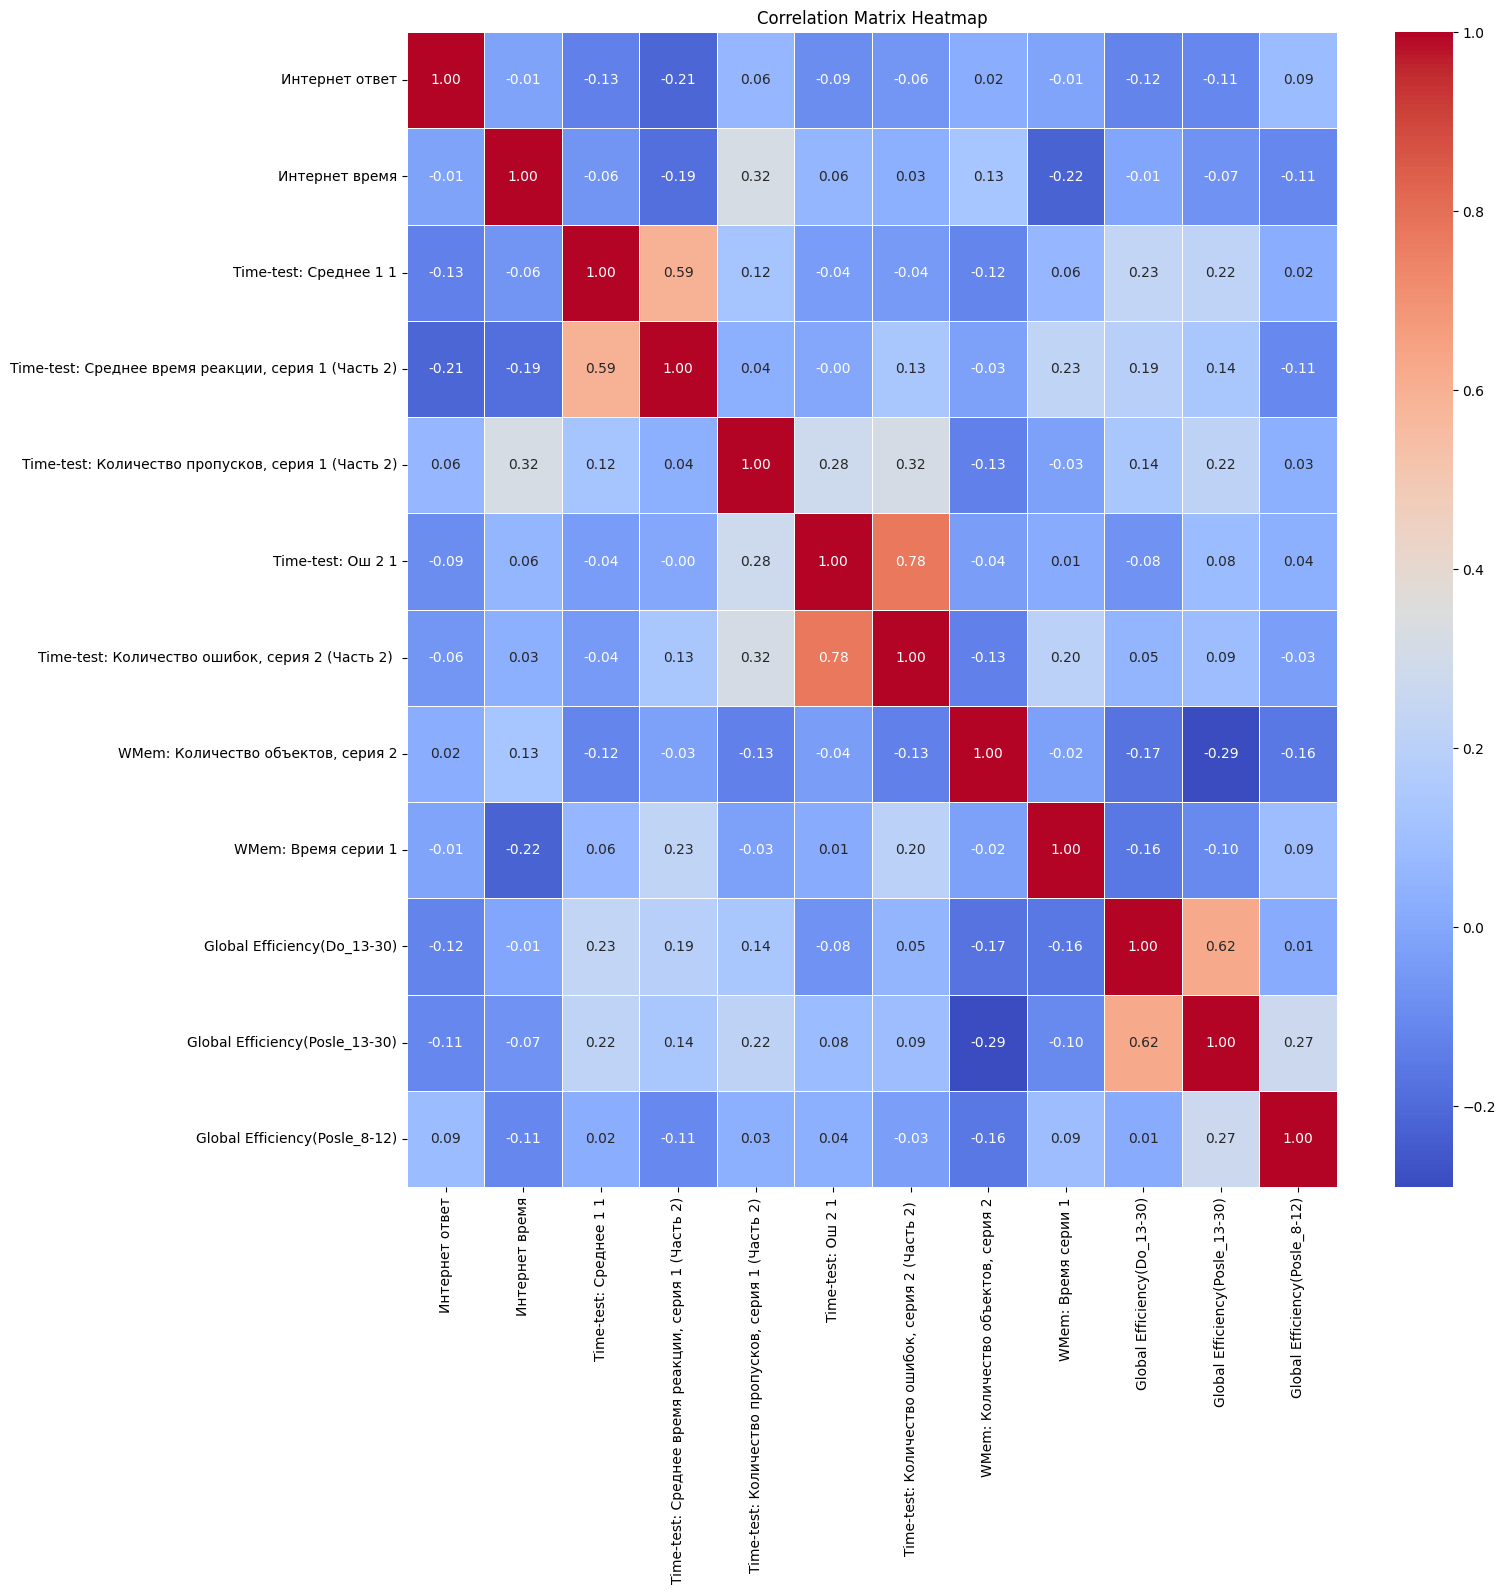

In [45]:
# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix with grid lines using HTML
print("Correlation Matrix:")
display(HTML(correlation_matrix.to_html()))

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [46]:
# Filter factor loadings to keep values higher than 0.3
filtered_factor_loading_df = factor_loading_df[factor_loading_df.abs() > 0.3]

# Replace NaN values with empty strings for better readability
filtered_factor_loading_df = filtered_factor_loading_df.fillna("")

# Print the filtered factor loadings table with grid lines using HTML
print("Filtered Factor Loadings Table (Values > 0.4):")
display(HTML(filtered_factor_loading_df.to_html()))

Filtered Factor Loadings Table (Values > 0.4):


In [40]:
# Calculate Communalities from factor analysis results
communalities = factor_analyzer.get_communalities()
communalities_df = pd.DataFrame(communalities, columns=["Communalities"], index=selected_data.columns)

# Print the Communalities table with grid lines using HTML
print("Communalities Table:")
display(HTML(communalities_df.to_html()))

Communalities Table:


In [41]:
import numpy as np

# Define a function to calculate Cronbach's Alpha
def cronbach_alpha(items):
    num_items = items.shape[1]

    # Calculate the covariance matrix
    cov_matrix = np.cov(items, rowvar=False)

    # Calculate the mean for each item
    item_means = np.mean(items, axis=0)

    # Calculate the overall variance of the scale
    scale_variance = np.var(items)

    # Calculate Cronbach's Alpha
    alpha = (num_items / (num_items - 1)) * (1 - (scale_variance / cov_matrix.sum()))

    return alpha

# Calculate Cronbach's Alpha for all selected variables
cronbach_alpha_value = cronbach_alpha(selected_data.to_numpy())

# Print the Cronbach's Alpha value for all selected variables
print("Cronbach's Alpha for Selected Variables (as a scale):", cronbach_alpha_value)

Cronbach's Alpha for Selected Variables (as a scale): 0.7375390152813595


In [18]:
import numpy as np
import pandas as pd

# Define a function to calculate Cronbach's Alpha
def cronbach_alpha(items):
    num_items = items.shape[1]

    # Calculate the covariance matrix
    cov_matrix = np.cov(items, rowvar=False)

    # Calculate the mean for each item
    item_means = np.mean(items, axis=0)

    # Calculate the overall variance of the scale
    scale_variance = np.var(items)

    # Calculate Cronbach's Alpha
    alpha = (num_items / (num_items - 1)) * (1 - (scale_variance / cov_matrix.sum()))

    return alpha

# Initialize a dictionary to store results
alpha_values = {}

# Calculate Cronbach's Alpha for all selected variables
cronbach_alpha_all = cronbach_alpha(selected_data.to_numpy())

# Iterate over each variable, temporarily removing it and calculating Cronbach's Alpha
for column in selected_data.columns:
    # Create a copy of the data with the current variable removed
    data_without_variable = selected_data.drop(columns=[column]).to_numpy()

    # Calculate Cronbach's Alpha without the current variable
    cronbach_alpha_without_variable = cronbach_alpha(data_without_variable)

    # Store the result in the dictionary
    alpha_values[column] = cronbach_alpha_without_variable

# Create a DataFrame to display the Cronbach's Alpha values if each item is deleted
alpha_table = pd.DataFrame.from_dict(alpha_values, orient='index', columns=['Cronbach Alpha if Item Deleted'])

# Print the table
print("Cronbach's Alpha if Item Deleted:")
display(alpha_table)

Cronbach's Alpha if Item Deleted:


Cronbach Alpha if Item Deleted
Интернет ответ                                                            0.958958
Интернет время                                                            0.958970
Time-test: Среднее 1 1                                                    0.958947
Time-test: Среднее время реакции, серия 1 (Част...                        0.958944
Time-test: Среднее время реакции, серия 2 (Част...                        0.958949
Time-test: Среднее время реакции, серия 2 (Част...                        0.958946
Time-test: Проп 1 1                                                       0.958958
Time-test: Количество пропусков, серия 1 (Часть 2)                        0.958958
Time-test: Количество пропусков, серия 2 (Часть 1)                        0.958958
Time-test: Количество пропусков, серия 2 (Часть 2)                        0.958958
Time-test: Ош 2 1                                                         0.958958
Time-test: Количество ошибок, серия 2 (Часть 2)                           0.958957
WMem: Количество объектов, серия 1                                        0.958954
WMem: Количество объектов, серия 2                                        0.958954
WMem: Количество объектов, серия 3                                        0.958953
WMem: Время серии 1                                                       0.979821
WMem: Время серии 2                                                       0.932092
WMem: Время серии 3                                                       0.934994
Забывание                                                                 0.958958
Обучение                                                                  0.958958
Количество фиксаций до области интереса (Чтение...                        0.958958
Время фиксации на области интереса (тексте)                               0.958957
Длительность первой фиксации на области интереса                          0.958958
Среднее время фиксации                                                    0.958958
Все фиксации                                                              0.958970
Modularity (Do_13-30)                                                     0.958958
Global Efficiency(Do_13-30)                                               0.958958
Modularity(Posle_13-30)                                                   0.958958
Global Efficiency(Posle_13-30)                                            0.958958
Modularity(Do_8-12)                                                       0.958958
Global Efficiency(Do_8-12)                                                0.958958
Modularity(Posle_8-12)                                                    0.958958
Global Efficiency(Posle_8-12)                                             0.958958

In [36]:
! pip install pingouin


In [43]:
import pingouin as pg

# Initialize a list to store Cronbach's Alpha values for each factor
cronbach_alpha_values = []

# Loop through each factor
for i in range(num_factors):
    # Extract the items (variables) that load on the factor based on factor loadings
    factor_loadings = factor_loading_df[f'Factor {i+1}']
    factor_items = selected_data.columns[abs(factor_loadings) >= 0.30]

    # Filter the selected data to include only the items for this factor
    factor_data = selected_data[factor_items]

    # Calculate Cronbach's Alpha for the factor
    alpha_result = pg.cronbach_alpha(factor_data)

    # Append the Alpha value to the list
    cronbach_alpha_values.append(alpha_result[0])  # Access the first element of the tuple

# Print Cronbach's Alpha values for each factor
for i, alpha in enumerate(cronbach_alpha_values):
    print(f"Cronbach's Alpha for Factor {i+1}: {alpha:.2f}")


Cronbach's Alpha for Factor 1: 0.46
Cronbach's Alpha for Factor 2: 0.73
Cronbach's Alpha for Factor 3: -0.00
Cronbach's Alpha for Factor 4: -0.03
